In [1]:
from experiment import Experiment
import torch
torch.manual_seed(2)
%matplotlib inline

In [2]:
var_dict = dict(
    numerical_vars = ['age', 'fnlwgt', 'education-num','hours-per-week'],
    categorical_vars = ['workclass', 'education', 'marital-status', 'occupation', 
                        'relationship', 'race', 'sex', 'native-country'],
    class_var = 'class'
)
#'capital-gain', 'capital-loss', 

In [4]:
exp = Experiment('data/adult.csv', 
                 var_dict,
                 embedding_dim=8,
                 lr=0.001,
                 batch_size=1024,
                 n_epoch=30,
                 verbose=True,
                 n_bins_range=range(2, 3),
                 n_init_bins_list=[10])

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

(array([  4.65740000e+04,   2.30000000e+01,   2.90000000e+01,
          7.06000000e+02,   1.16900000e+03,   3.07000000e+02,
          2.10000000e+01,   2.00000000e+00,   8.00000000e+00,
          3.00000000e+00]),
 array([    0. ,   435.6,   871.2,  1306.8,  1742.4,  2178. ,  2613.6,
         3049.2,  3484.8,  3920.4,  4356. ]),
 <a list of 10 Patch objects>)

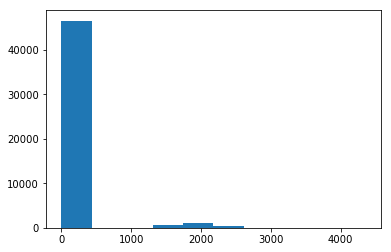

In [50]:
plt.hist(exp.data['capital-loss'], bins=10)

In [58]:
pd.qcut(exp.data['capital-loss'], 10, duplicates='drop')

0        (-0.001, 4356.0]
1        (-0.001, 4356.0]
2        (-0.001, 4356.0]
3        (-0.001, 4356.0]
4        (-0.001, 4356.0]
5        (-0.001, 4356.0]
6        (-0.001, 4356.0]
7        (-0.001, 4356.0]
8        (-0.001, 4356.0]
9        (-0.001, 4356.0]
10       (-0.001, 4356.0]
11       (-0.001, 4356.0]
12       (-0.001, 4356.0]
13       (-0.001, 4356.0]
14       (-0.001, 4356.0]
15       (-0.001, 4356.0]
16       (-0.001, 4356.0]
17       (-0.001, 4356.0]
18       (-0.001, 4356.0]
19       (-0.001, 4356.0]
20       (-0.001, 4356.0]
21       (-0.001, 4356.0]
22       (-0.001, 4356.0]
23       (-0.001, 4356.0]
24       (-0.001, 4356.0]
25       (-0.001, 4356.0]
26       (-0.001, 4356.0]
27       (-0.001, 4356.0]
28       (-0.001, 4356.0]
29       (-0.001, 4356.0]
               ...       
48812    (-0.001, 4356.0]
48813    (-0.001, 4356.0]
48814    (-0.001, 4356.0]
48815    (-0.001, 4356.0]
48816    (-0.001, 4356.0]
48817    (-0.001, 4356.0]
48818    (-0.001, 4356.0]
48819    (-0

In [5]:
from data_handler import DataHandler
handler = DataHandler(exp.data, exp.var_dict)
from semantic_binning import SemanticBinning
sb = SemanticBinning(handler.var_dict, embedding_dim=8, batch_size=1024, 
                     n_epoch=300, lr=2e-4, weight_decay=0.0, verbose=True)
sb.fit(exp.data, n_init_bins=15)

>>> Epoch = 1, Loss = 0.6483405828475952
[13, 9, 5, 5]
>>> Epoch = 2, Loss = 0.496114581823349
[13, 8, 4, 5]
>>> Epoch = 3, Loss = 0.38697299361228943
[4, 10, 4, 4]
>>> Epoch = 4, Loss = 0.3041911721229553
[8, 10, 4, 4]
>>> Epoch = 5, Loss = 0.2559662163257599
[4, 8, 6, 4]
>>> Epoch = 6, Loss = 0.22545963525772095
[4, 10, 6, 4]
>>> Epoch = 7, Loss = 0.21139194071292877
[8, 8, 4, 4]
>>> Epoch = 8, Loss = 0.1988258957862854
[8, 9, 4, 4]
>>> Epoch = 9, Loss = 0.19265660643577576
[8, 10, 4, 4]
>>> Epoch = 10, Loss = 0.18921305239200592
[8, 10, 4, 4]
>>> Epoch = 11, Loss = 0.18310701847076416
[8, 10, 4, 4]
>>> Epoch = 12, Loss = 0.18326245248317719
[8, 10, 4, 4]
>>> Epoch = 13, Loss = 0.18257346749305725
[9, 10, 4, 4]
>>> Epoch = 14, Loss = 0.1811443716287613
[9, 10, 4, 4]
>>> Epoch = 15, Loss = 0.18081220984458923
[9, 10, 4, 4]
>>> Epoch = 16, Loss = 0.17968136072158813
[9, 10, 4, 4]
>>> Epoch = 17, Loss = 0.17983421683311462
[9, 10, 4, 4]
>>> Epoch = 18, Loss = 0.1814146339893341
[9, 10, 

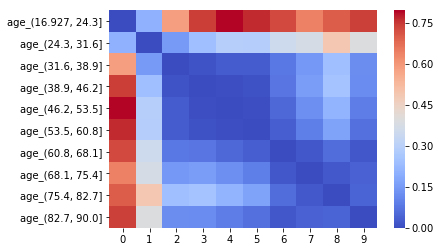

In [32]:
sb.plot_pairwise_distance_between_bins('age')

In [33]:
sb.bins_by_var['age']['bins']

['(16.927, 31.6]', '(31.6, 90.0]']

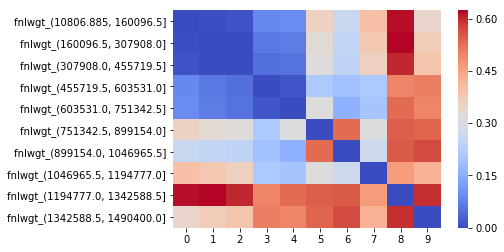

In [34]:
sb.plot_pairwise_distance_between_bins('fnlwgt')

In [35]:
sb.bins_by_var['fnlwgt']['bins']

['(10806.885, 751342.5]',
 '(751342.5, 899154.0]',
 '(899154.0, 1046965.5]',
 '(1046965.5, 1490400.0]']

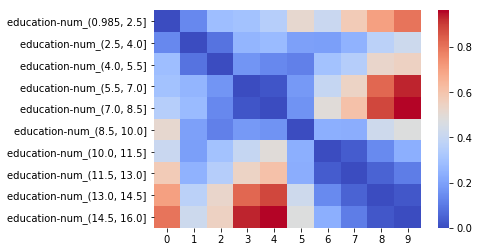

In [36]:
sb.plot_pairwise_distance_between_bins('education-num')

In [37]:
sb.bins_by_var['education-num']['bins']

['(0.985, 2.5]',
 '(2.5, 5.5]',
 '(5.5, 8.5]',
 '(8.5, 10.0]',
 '(10.0, 13.0]',
 '(13.0, 16.0]']

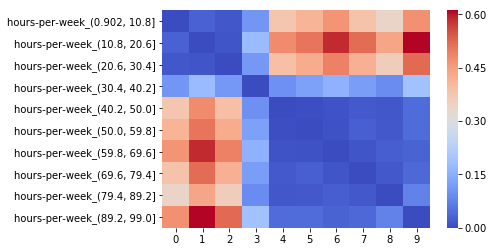

In [38]:
sb.plot_pairwise_distance_between_bins('hours-per-week')

In [39]:
sb.bins_by_var['hours-per-week']['bins']

['(0.902, 30.4]', '(30.4, 99.0]']

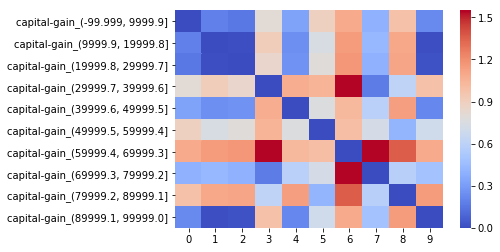

In [40]:
sb.plot_pairwise_distance_between_bins('capital-gain')

In [41]:
sb.bins_by_var['capital-gain']['bins']

['(-99.999, 29999.7]',
 '(29999.7, 39999.6]',
 '(39999.6, 49999.5]',
 '(49999.5, 59999.4]',
 '(59999.4, 69999.3]',
 '(69999.3, 79999.2]',
 '(79999.2, 89999.1]',
 '(89999.1, 99999.0]']

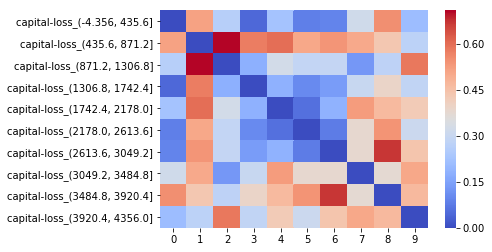

In [42]:
sb.plot_pairwise_distance_between_bins('capital-loss')

In [43]:
sb.bins_by_var['capital-loss']['bins']

['(-4.356, 435.6]',
 '(435.6, 871.2]',
 '(871.2, 1306.8]',
 '(1306.8, 3049.2]',
 '(3049.2, 3920.4]',
 '(3920.4, 4356.0]']

In [ ]:
%time clustering_scores = exp.test_clustering_performance()

In [ ]:
exp.print_clustering_scores(clustering_scores, method='dummy_only')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='scale_numeric')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='equal_width')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='equal_freq')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='semantic_binning')

In [ ]:
exp.semantic_binning.visualize_bin_embeddings()

In [ ]:
%time clf_scores = exp.test_classification_performance(cv=3)

In [ ]:
exp.print_classification_scores(clf_scores, method='dummy_only')

In [ ]:
exp.print_classification_scores(clf_scores, method='scale_numeric')

In [ ]:
exp.print_classification_scores(clf_scores, method='equal_width')

In [ ]:
exp.print_classification_scores(clf_scores, method='equal_freq')

In [ ]:
exp.print_classification_scores(clf_scores, method='semantic_binning')

In [ ]:
exp.semantic_binning.plot_pairwise_distance_between_bins('OD280/OD315_of_diluted_wines')

In [ ]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Proline')

In [ ]:
for var, bins in exp.semantic_binning.bins_by_var.items():
    print(var)
    print(bins['bins'])

In [59]:
import torch
from torch import nn
from torch.autograd import Variable
from torch.nn import functional as F

In [63]:
num_bins_by_var = dict()

In [64]:
for var in exp.var_dict['categorical_vars']:
    num_bins_by_var[var] = len(exp.data[var].unique())

In [65]:
for var in exp.var_dict['numerical_vars']:
    num_bins_by_var[var] = 15

In [66]:
num_bins_by_var

{'age': 15,
 'capital-gain': 15,
 'capital-loss': 15,
 'education': 16,
 'education-num': 15,
 'fnlwgt': 15,
 'hours-per-week': 15,
 'marital-status': 7,
 'native-country': 42,
 'occupation': 15,
 'race': 5,
 'relationship': 6,
 'sex': 2,
 'workclass': 9}

In [ ]:
nn.Linear

In [108]:
class BinEmbedding(nn.Module):
      
    def __init__(self, num_bins_by_var, embedding_dim):
        super(BinEmbedding, self).__init__()
        n_total_bins = sum(num_bins_by_var.values())
        self.embedding = nn.Embedding(n_total_bins, embedding_dim)
        self.decoders = nn.ModuleList()
        for var, n_bins in num_bins_by_var.items():
            self.decoders.append(nn.Linear(embedding_dim, n_bins, bias=True))
        
    def forward(self, x):
        h = self.embedding(x)
        outputs = []
        for decoder in self.decoders:
            outputs.append(decoder(h))
        return outputs

In [109]:
be = BinEmbedding(num_bins_by_var, 8)

In [110]:
out = be(Variable(torch.LongTensor([2])))

In [111]:
loss_ftn = nn.CrossEntropyLoss()

In [112]:
dum = handler.get_dummy_coded_data()

In [115]:
inputs = [np.argmax(row.values) for _, row in dum.iterrows()]

In [117]:
max(inputs)

8

In [97]:
targets_by_var = dict()
for var in exp.var_dict['categorical_vars']:
    dummy_var = pd.get_dummies(exp.data[var])
    targets = [np.argmax(row.values) for _, row in dummy_var.iterrows()]
    targets_by_var[var] = targets

In [98]:
targets_by_var.keys()

dict_keys(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])

In [105]:
for var in exp.var_dict['numerical_vars']:
    dummy_var = pd.get_dummies(pd.qcut(exp.data[var], q=15, duplicates='drop'))
    targets = [np.argmax(row.values) for _, row in dummy_var.iterrows()]
    targets_by_var[var] = targets

In [106]:
targets_by_var.keys()

dict_keys(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'age', 'fnlwgt', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss'])

In [107]:
targets_by_var['fnlwgt']

[1,
 1,
 10,
 11,
 13,
 12,
 6,
 9,
 0,
 6,
 12,
 5,
 4,
 9,
 4,
 11,
 7,
 8,
 0,
 12,
 8,
 13,
 1,
 3,
 3,
 10,
 6,
 7,
 14,
 8,
 8,
 12,
 14,
 1,
 13,
 11,
 9,
 14,
 2,
 12,
 14,
 2,
 7,
 2,
 12,
 13,
 5,
 4,
 2,
 12,
 0,
 10,
 1,
 11,
 3,
 11,
 10,
 1,
 5,
 8,
 1,
 12,
 5,
 3,
 2,
 5,
 7,
 6,
 8,
 9,
 2,
 13,
 6,
 10,
 4,
 10,
 0,
 10,
 13,
 4,
 14,
 12,
 1,
 6,
 13,
 13,
 12,
 9,
 1,
 14,
 11,
 12,
 10,
 3,
 10,
 3,
 8,
 9,
 6,
 11,
 4,
 9,
 5,
 8,
 2,
 13,
 13,
 8,
 8,
 4,
 14,
 1,
 13,
 14,
 2,
 2,
 13,
 9,
 11,
 2,
 9,
 3,
 1,
 12,
 12,
 12,
 3,
 3,
 4,
 14,
 1,
 0,
 3,
 11,
 5,
 4,
 1,
 6,
 0,
 1,
 1,
 11,
 13,
 9,
 2,
 8,
 7,
 3,
 7,
 7,
 8,
 9,
 6,
 12,
 11,
 8,
 10,
 14,
 8,
 10,
 0,
 11,
 1,
 2,
 9,
 9,
 11,
 2,
 0,
 1,
 4,
 7,
 2,
 14,
 5,
 11,
 13,
 14,
 7,
 0,
 7,
 3,
 14,
 12,
 0,
 13,
 5,
 4,
 2,
 3,
 5,
 6,
 14,
 3,
 4,
 9,
 2,
 1,
 4,
 0,
 14,
 6,
 11,
 11,
 0,
 4,
 4,
 0,
 9,
 1,
 6,
 9,
 5,
 2,
 4,
 14,
 13,
 7,
 3,
 11,
 9,
 8,
 1,
 7,
 4,
 11,
 0,
 6,
 13,
 7,
 1

In [86]:
exp.data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [92]:
import numpy as np

In [95]:
for idx, row in pd.get_dummies(exp.data['workclass']).iterrows():
    print(np.argmax(row.values))

7
6
4
4
4
4
4
6
4
4
4
7
4
4
4
4
6
4
4
6
4
4
1
4
4
2
4
0
4
4
2
4
4
1
7
4
4
4
4
6
4
6
4
4
4
1
4
4
7
4
4
4
4
1
5
4
4
4
4
4
4
0
4
4
4
4
4
4
5
0
4
4
6
4
4
4
4
0
4
2
4
4
4
4
4
4
2
4
4
1
4
4
4
4
2
2
6
4
4
1
4
4
6
4
4
5
0
4
2
4
4
4
6
4
4
4
5
2
4
4
4
4
4
7
4
4
4
4
0
4
4
4
6
4
4
1
6
4
4
4
5
4
4
4
4
4
4
4
4
0
2
4
4
4
0
4
4
6
4
4
0
4
5
4
6
4
1
7
4
2
4
7
4
4
7
4
4
4
4
4
2
4
4
4
1
4
6
0
4
7
4
4
2
4
1
4
4
1
4
6
4
0
4
2
7
4
4
4
5
4
2
4
4
4
5
4
4
4
4
4
4
0
4
4
2
4
0
6
4
4
4
4
4
4
4
7
7
4
2
4
4
6
7
0
4
4
4
4
4
4
4
4
2
2
4
6
4
4
4
4
4
4
4
4
4
5
0
4
4
4
4
4
6
2
4
4
4
4
4
4
4
2
4
4
4
1
4
4
4
4
4
4
2
4
4
4
5
0
4
4
4
4
4
4
4
4
4
4
4
5
4
4
0
6
4
4
6
4
4
4
6
4
4
4
6
6
0
4
6
4
4
4
4
2
4
4
4
4
4
4
4
4
7
4
7
6
0
0
4
4
4
4
4
2
0
1
4
4
4
6
4
4
4
4
4
4
6
4
4
4
1
4
7
4
4
2
4
4
6
4
4
4
4
4
2
4
4
4
4
4
4
4
6
7
4
4
4
0
4
5
4
4
7
4
4
4
4
6
0
4
2
4
4
4
7
4
4
4
2
7
4
4
7
4
4
4
1
4
5
2
0
0
6
4
4
4
2
2
4
2
4
4
1
4
4
4
4
4
4
0
4
5
4
4
6
4
4
4
4
0
4
2
4
4
4
4
4
4
4
4
4
0
4
4
4
4
4
4
4
4
4
6
7
4
0
4
0
2
2
4
4
1
4
4
4
4
4
4
4
0


4
4
6
4
4
4
0
4
0
4
4
4
1
2
5
4
6
4
4
4
4
4
4
5
4
2
5
4
4
4
4
4
4
6
4
4
7
6
7
2
4
4
2
4
1
4
0
4
4
4
1
5
2
1
4
4
4
6
4
5
6
4
4
4
4
1
7
4
4
7
4
6
4
4
4
4
4
4
4
2
4
7
4
7
4
4
4
4
4
4
0
6
4
4
2
4
4
6
4
4
4
6
1
4
4
4
4
4
4
4
4
6
4
4
6
4
4
4
4
4
4
7
2
4
5
2
4
7
4
6
4
4
4
4
5
4
4
4
4
1
6
4
4
4
4
7
4
4
4
2
4
4
4
7
4
6
4
7
4
2
4
4
4
5
1
7
4
4
4
4
4
4
4
0
6
4
4
6
4
4
4
6
0
4
4
4
2
4
2
4
4
4
1
2
6
6
4
4
0
4
4
6
4
4
2
2
4
4
4
7
4
4
6
4
4
4
5
4
4
0
4
2
7
4
0
4
1
6
2
4
6
4
4
0
4
0
4
4
6
4
0
4
4
4
4
5
4
4
1
4
4
4
4
2
0
4
7
4
2
5
5
4
4
4
1
6
4
4
7
4
4
1
4
4
6
6
4
2
4
2
4
0
4
4
4
4
4
4
4
4
4
1
6
4
7
4
4
4
4
4
4
4
4
4
4
5
7
4
4
4
4
5
4
4
4
4
6
4
4
6
0
4
0
4
4
6
4
4
0
4
4
1
6
0
4
4
4
6
4
6
6
4
4
4
2
4
0
0
4
4
4
4
4
4
4
2
4
4
4
4
4
4
4
4
4
4
0
4
4
4
0
4
0
4
4
4
4
4
4
2
4
4
4
4
4
4
2
3
4
6
6
2
4
4
5
4
2
4
4
4
4
1
4
4
4
4
4
4
4
0
0
4
7
4
4
6
4
4
4
7
7
4
4
6
4
4
5
4
2
4
4
4
4
4
6
4
4
2
4
2
4
4
4
4
4
4
4
6
4
7
4
4
4
7
4
4
4
4
4
7
4
4
4
1
4
4
0
4
4
4
4
4
0
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
4
4
5
4
6
0
4
4


6
4
0
4
2
4
4
4
4
4
7
4
4
7
6
4
4
4
7
6
4
2
4
4
4
4
6
0
4
2
2
4
4
4
0
4
4
4
4
4
0
4
4
4
6
4
2
4
6
4
0
4
4
5
4
2
7
4
4
6
4
4
4
4
2
5
4
2
4
4
4
4
4
5
4
4
4
4
4
2
4
0
4
6
4
7
0
4
2
2
4
2
4
4
4
4
4
4
1
0
6
4
7
4
1
6
4
0
6
4
2
4
4
4
4
6
4
4
7
4
4
2
4
4
4
4
4
0
4
4
1
4
0
6
4
4
6
4
2
7
4
4
4
4
2
2
1
7
4
2
5
4
4
4
2
4
6
4
4
4
4
4
4
4
4
4
0
4
4
4
4
4
7
4
4
2
0
4
4
4
2
4
4
4
4
4
4
4
4
4
4
4
4
6
4
4
6
4
4
4
0
4
4
4
2
4
2
4
4
4
2
4
4
4
4
4
4
4
4
4
4
4
7
6
2
2
6
4
5
4
4
4
4
7
2
4
4
4
7
6
4
4
4
4
4
6
4
4
4
4
4
4
7
0
4
4
2
2
0
4
4
4
0
4
4
4
4
6
6
6
2
7
4
4
4
7
4
4
4
4
5
4
4
4
4
4
4
4
4
6
4
4
4
6
4
4
7
4
4
2
4
4
4
2
6
4
4
4
4
4
4
2
4
4
6
4
4
4
4
4
4
4
4
4
4
4
4
4
0
4
1
4
2
4
4
5
4
0
6
4
4
4
4
7
4
2
4
5
4
4
4
4
4
4
4
5
4
4
2
4
4
4
2
4
4
4
4
6
1
4
2
5
4
2
4
2
4
2
7
5
4
4
4
6
4
4
7
4
4
4
4
4
5
4
4
4
6
6
4
4
4
4
4
4
4
4
2
6
4
6
0
6
7
1
4
4
4
4
4
4
4
1
0
2
5
2
4
4
2
4
1
4
4
2
5
0
4
4
4
4
4
4
4
4
2
4
4
4
4
4
4
4
4
4
4
4
4
0
4
4
4
4
4
4
4
4
4
6
4
5
6
4
4
4
4
4
0
0
6
2
4
1
6
4
4
4
6
5
0
1
4
6
4
4
4
4
4
4
6
4


6
4
6
7
0
4
4
4
1
4
4
2
7
4
4
5
4
4
4
4
0
2
4
4
4
6
1
4
4
4
4
5
4
4
5
4
4
4
4
4
4
4
4
2
4
2
4
4
2
1
4
6
4
2
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
4
6
2
7
0
4
4
4
4
4
4
4
4
4
5
2
5
4
4
4
4
6
4
4
4
4
4
6
7
4
6
4
4
4
4
2
4
2
5
1
5
4
4
5
2
1
4
4
4
4
4
7
0
4
4
4
4
4
4
4
7
4
4
4
4
4
0
4
4
4
4
4
4
4
4
1
6
1
4
4
4
2
4
4
4
4
4
4
1
6
4
4
4
7
4
4
4
4
6
4
4
4
4
4
4
4
1
0
4
4
4
1
4
4
4
4
4
0
4
4
4
7
0
4
4
4
4
4
6
4
4
4
4
4
4
4
2
4
4
4
4
2
4
6
4
4
4
4
4
6
0
4
4
6
4
4
4
4
2
4
4
4
4
4
4
4
7
4
2
4
4
4
5
1
6
4
4
0
2
2
4
4
4
5
4
4
4
4
4
4
4
7
4
4
6
4
4
4
4
4
4
4
0
5
4
4
4
1
4
4
6
4
0
4
2
7
0
4
4
5
4
6
4
4
4
4
4
6
4
2
4
4
4
4
4
5
2
5
4
1
6
4
4
4
4
5
2
5
4
4
4
4
4
0
0
4
6
4
5
4
4
4
4
4
4
4
4
4
6
4
4
5
7
4
5
6
1
4
4
0
4
5
4
5
6
4
2
6
1
4
4
4
1
4
2
4
4
4
4
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
4
4
4
4
4
6
4
0
4
4
4
6
4
4
4
4
1
4
4
4
5
0
4
2
2
0
4
4
1
4
4
4
4
4
4
4
4
0
4
5
0
4
4
4
4
5
4
0
5
4
4
4
1
6
4
2
5
4
5
6
4
6
4
2
1
4
4
4
4
4
4
2
2
6
5
0
6
1
6
4
4
4
4
4
2
4
4
6
4
4
4
4
4
4
4
0
4
7
4
4
4
4
4
4
7
4


KeyboardInterrupt: 

In [84]:
num_bins_by_var

{'age': 15,
 'capital-gain': 15,
 'capital-loss': 15,
 'education': 16,
 'education-num': 15,
 'fnlwgt': 15,
 'hours-per-week': 15,
 'marital-status': 7,
 'native-country': 42,
 'occupation': 15,
 'race': 5,
 'relationship': 6,
 'sex': 2,
 'workclass': 9}

In [ ]:
targets = 

In [ ]:
def generate_instances(dummy_coded_data, n_variables):
        
    def make_target_vector(input_idx, non_zero_idxs, n_dummy_cols):
        target_vector = []
        for idx in range(n_dummy_cols):
            if (idx != input_idx and idx in non_zero_idxs):
                target_vector.append(1.0)
            else:
                target_vector.append(0.0)
        return target_vector

    inputs, targets = list(), list()
    n_dummy_cols = dummy_coded_data.shape[1]

    for _, row in dummy_coded_data.iterrows():
        non_zero_idxs = [idx for idx, (_, value) in enumerate(row.items()) if value == 1]
        for input_idx in non_zero_idxs:
            inputs.append(input_idx)
            targets.append(make_target_vector(input_idx, non_zero_idxs, n_dummy_cols))

    return inputs, targets

In [ ]:
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from batch_generator import BatchGenerator
from embedding_model import BinEmbedding


class BinEmbedder:    

    def _generate_instances(self, dummy_coded_data, n_variables):
        
        def make_target_vector(input_idx, non_zero_idxs, n_dummy_cols):
            target_vector = []
            for idx in range(n_dummy_cols):
                if (idx != input_idx and idx in non_zero_idxs):
                    target_vector.append(1.0)
                else:
                    target_vector.append(0.0)
            return target_vector
        
        inputs, targets = list(), list()
        n_dummy_cols = dummy_coded_data.shape[1]
        
        for _, row in dummy_coded_data.iterrows():
            non_zero_idxs = [idx for idx, (_, value) in enumerate(row.items()) if value == 1]
            for input_idx in non_zero_idxs:
                inputs.append(input_idx)
                targets.append(make_target_vector(input_idx, non_zero_idxs, n_dummy_cols))
                
        return inputs, targets

    def learn_bin_embeddings(self, dummy_coded_data, var_dict, embedding_dim,
                            lr, n_epoch, weight_decay, batch_size, verbose):
        
        n_variables = len(var_dict['numerical_vars'])
        if 'categorical_vars' in var_dict:
            n_variables += len(var_dict['categorical_vars'])
        inputs, targets = self._generate_instances(dummy_coded_data, n_variables)
        
        n_instances = len(dummy_coded_data)
        n_dummy_cols = dummy_coded_data.shape[1]
        batch_size = min(int(n_instances / 10), batch_size)
        n_iter_per_epoch = int(np.ceil(n_instances * (n_variables - 1) / batch_size))
        batch_gen = BatchGenerator(inputs, targets, batch_size)
        
        dummy_cols = dummy_coded_data.columns
        
        self.bin_embedding = BinEmbedding(n_dummy_cols, embedding_dim).cuda()
        
        loss_ftn = nn.BCEWithLogitsLoss()
        
        opt = torch.optim.Adam(self.bin_embedding.parameters(), lr=lr, weight_decay=weight_decay)
        
        for it in range(n_iter_per_epoch * n_epoch):
            
            input_batch, target_batch = batch_gen.next_batch()
            
            opt.zero_grad()
            
            input_batch = Variable(torch.LongTensor(input_batch)).cuda()
            target_batch = Variable(torch.FloatTensor(target_batch)).cuda()
            
            out = self.bin_embedding(input_batch)

            loss = loss_ftn(out, target_batch)
            loss.backward()
            opt.step()

            if ((it+1) % n_iter_per_epoch == 0) and verbose:
                print('>>> Epoch = {}, Loss = {}'.format(int((it+1) / n_iter_per_epoch), loss.data[0]))
                
                ###
                from merge_bins import BinMerger
                embedding_weights = self.bin_embedding.state_dict()['embedding.weight']
                embedding_by_column = dict(zip(list(dummy_coded_data.columns), embedding_weights.cpu().numpy()))
                bin_merger = BinMerger(embedding_by_column)
                num_bins = []
                for var in var_dict['numerical_vars']:
                    merged_bins, _ = bin_merger._merge_bins(var)
                    num_bins.append(len(merged_bins))
                print(num_bins)
                ###
                
        if verbose:       
            print('Learning Embedding Finished!')
        
        embedding_weights = self.bin_embedding.state_dict()['embedding.weight'].cpu().numpy()
        self.embedding_by_column = dict(zip(list(dummy_coded_data.columns), embedding_weights))
    
    def visualize_embeddings(self, figsize=(20,20)):
        
        col_names = list(self.embedding_by_column.keys())
        embedding_weights = list(self.embedding_by_column.values())
        tsne = TSNE().fit_transform(embedding_weights)
        
        plt.figure(figsize=figsize)
        plt.scatter(x=tsne[:,0], y=tsne[:,1])
        
        for i, xy in enumerate(zip(tsne[:,0], tsne[:,1])):
            plt.annotate(col_names[i], xy)
